In [67]:
import pandas as pd

# Load the CSV file
file_path = r'/content/drive/MyDrive/Evaluation-dataset.csv'
df = pd.read_csv(file_path, header=None)


In [68]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Separate reviews and insights
reviews = df.iloc[:, 0]  # First column contains reviews
insights = df.iloc[:, 1:]  # Other columns contain insights

# Get insight names and their frequencies
insight_names = insights.columns
#insight_frequencies = insights.sum()




In [71]:
insights.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Reshape the dataframe to a single column and stack the values
stacked_insights = insights.stack()

# Count the occurrences of each insight
insight_counts = stacked_insights.value_counts()

# Print unique insights and their counts
print("Unique Insights and Their Counts:")
print(insight_counts)

Unique Insights and Their Counts:
value for money positive                                                                                                                                                                                                                                                                                                                                                                                                                                              4780
garage service positive                                                                                                                                                                                                                                                                                                                                                                                                                                               2031
ease of booking positive                        

<ipython-input-73-20a99e026167>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


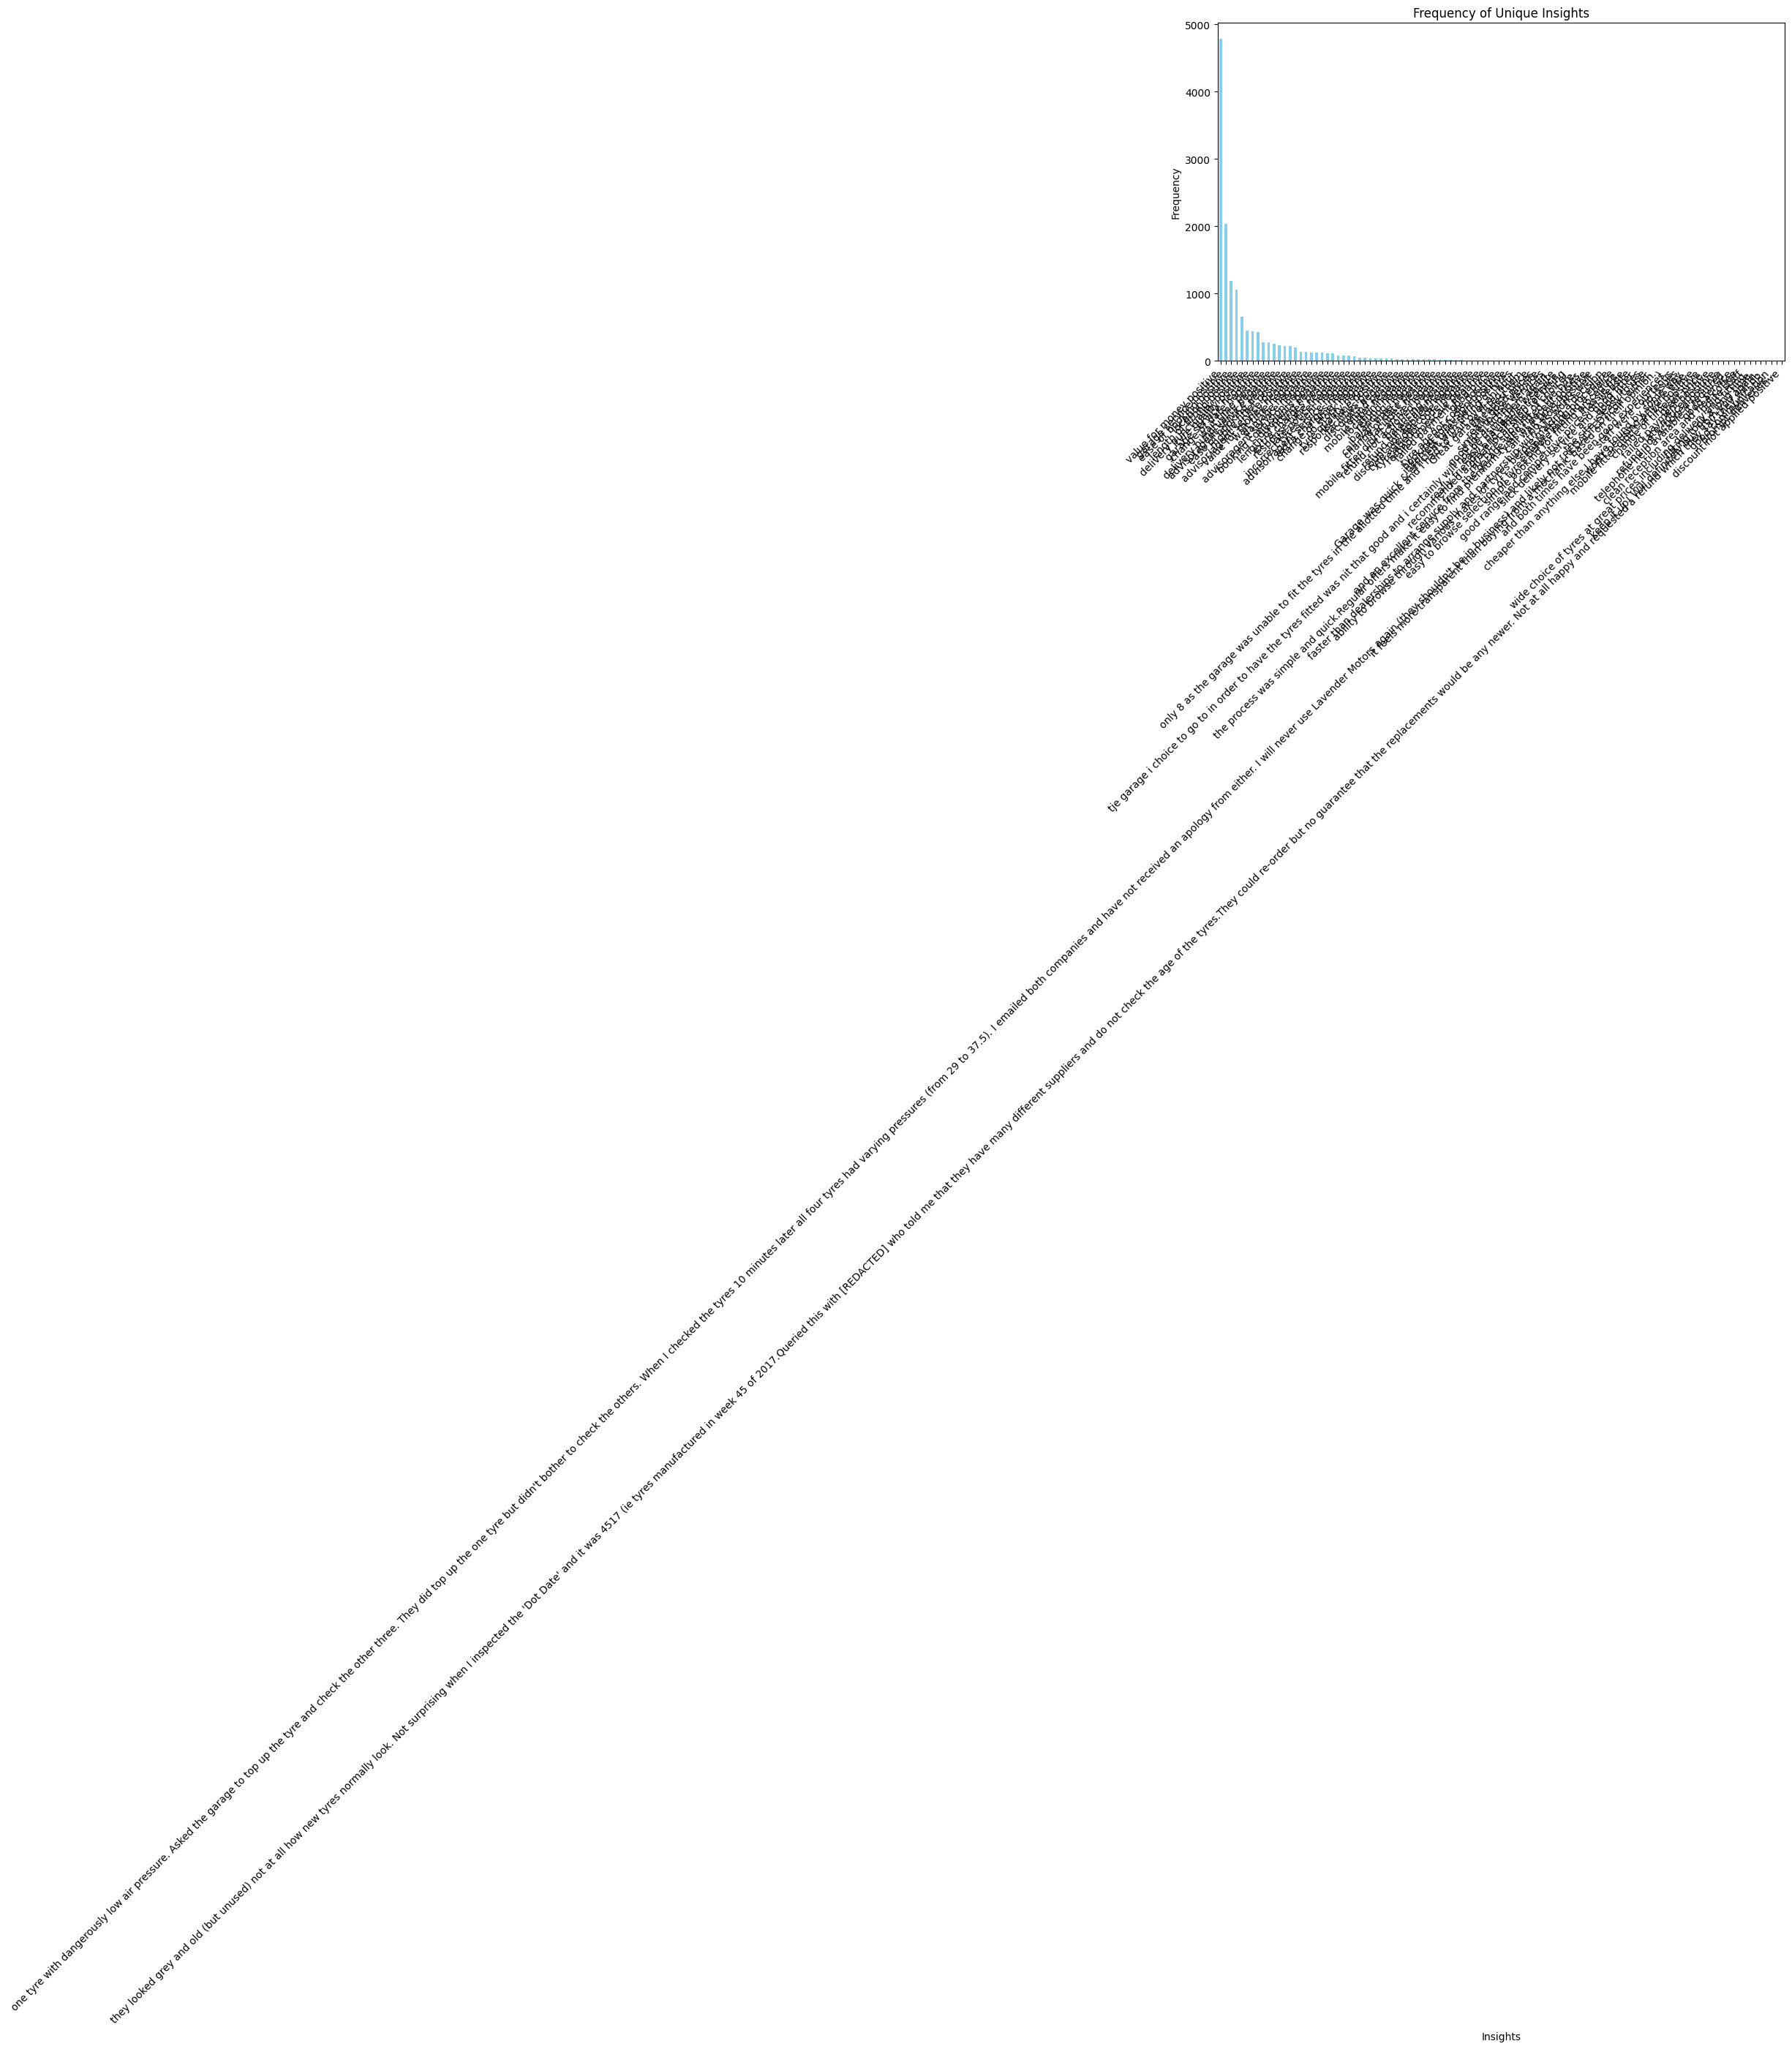

In [73]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
insight_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Unique Insights')
plt.xlabel('Insights')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Filter insights ending with "positive"
positive_insights = insight_counts[insight_counts.index.str.endswith('positive')]
plt.show()

There are two many insights (sub-themes) that are both positive and negative. Working with so many insights is akin to invoking the curse of dimensionality. Also, most of these have small frequency, when compared to the others. So, I believe that it is better to train with top 10 sentiments from each kind of sentimenent - 'positive' and 'negative'.

In [74]:
# Filter insights ending with "positive"
positive_insights = insight_counts[insight_counts.index.str.endswith('positive')]


# Select the top 10 positive insights
top_10_positive_insights = positive_insights.head(10)


In [75]:
# Print top 10 positive insights and their counts
print("Top 10 Insights Ending with 'positive':")
print(top_10_positive_insights)

Top 10 Insights Ending with 'positive':
value for money positive         4780
garage service positive          2031
ease of booking positive         1187
location positive                1063
length of fitting positive        657
delivery punctuality positive     453
tyre quality positive             434
wait time positive                274
advisoragent service positive     233
mobile fitter positive            225
Name: count, dtype: int64


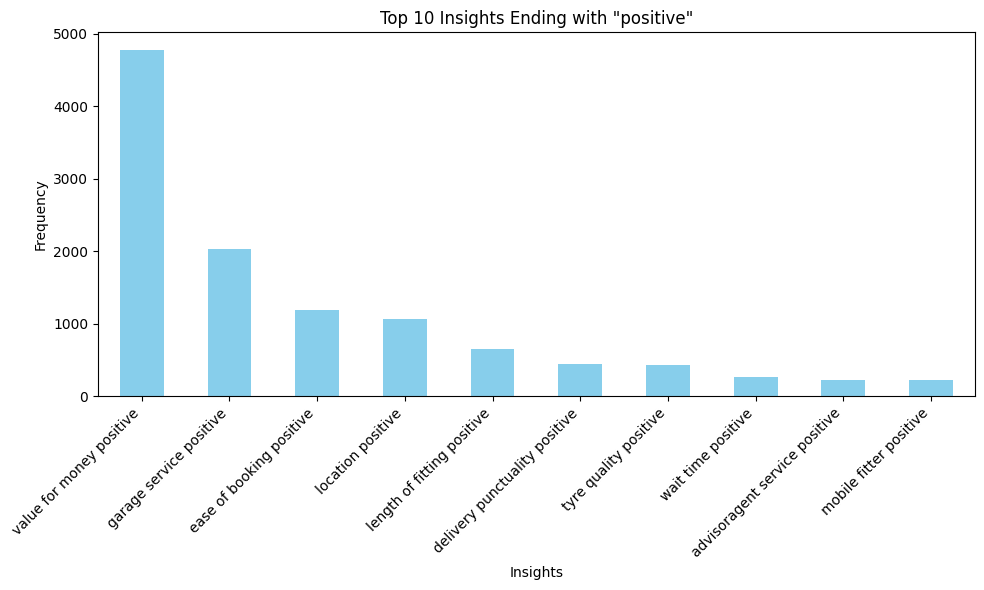

In [76]:
# Plotting
plt.figure(figsize=(10, 6))
top_10_positive_insights.plot(kind='bar', color='skyblue')
plt.title('Top 10 Insights Ending with "positive"')
plt.xlabel('Insights')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [77]:
# Filter insights ending with "negative"
negative_insights = insight_counts[insight_counts.index.str.endswith('negative')]

# Select the top 10 negative insights
top_10_negative_insights = negative_insights.head(10)


In [78]:
# Print top 10 negative insights and their counts
print("Top 10 Insights Ending with 'negative':")
print(top_10_negative_insights)

Top 10 Insights Ending with 'negative':
garage service negative          423
change of date negative          277
delivery punctuality negative    250
ease of booking negative         227
value for money negative         136
wait time negative               135
damage negative                  127
advisoragent service negative    125
booking confusion negative       119
length of fitting negative       109
Name: count, dtype: int64


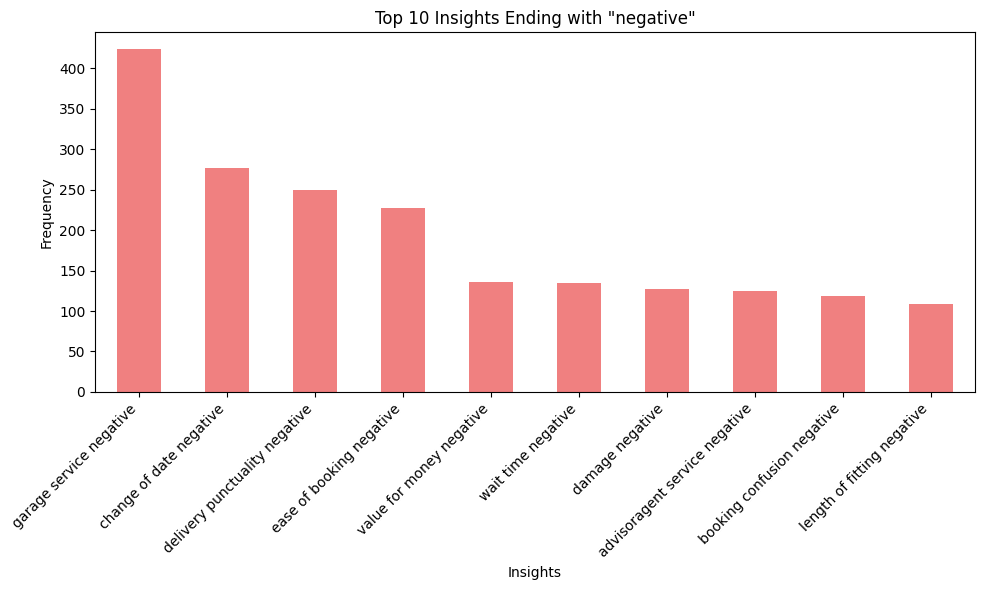

In [79]:
# Plotting
plt.figure(figsize=(10, 6))
top_10_negative_insights.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Insights Ending with "negative"')
plt.xlabel('Insights')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There are two many labels once again, and it can be clearly seen that majority of the labels (insight sentiments) are with the positive sentiment. To make the model simpler, more stable, and reduce any biases it seems inituitive to work with the top labels from the positive sample, as they are in the majority. It can also help in dealing with the problem of undersampling that arises here.

At the same time, we don't want to train our model to predict only the positive sentiment. It should be a generalized model that can predict any kind of sentiment. So, to me, the optimal solution feels like selecting top 5 labels (insight sentiments) from each kind of sentiment, and then build a generalized model.

In [80]:
# Filter insights ending with "positive" and select top 5
positive_insights = insight_counts[insight_counts.index.str.endswith('positive')].head(5)

# Filter insights ending with "negative" and select top 5
negative_insights = insight_counts[insight_counts.index.str.endswith('negative')].head(5)

# Combine top 5 positive and negative insights
top_5_insights = pd.concat([positive_insights, negative_insights])

# Create a mask to filter the DataFrame
mask = insights.apply(lambda x: x.isin(top_5_insights.index)).any(axis=1)

# Filter the dataframe to keep only the rows with top 5 insights
filtered_df = df[mask]

# Print the filtered dataframe
print(filtered_df)

# If you want to drop columns not related to top 5 insights, you can do this:
filtered_insights = insights.apply(lambda x: x[x.isin(top_5_insights.index)])
filtered_reviews = filtered_df.iloc[:, 0]  # The first column contains reviews

# Concatenate the filtered reviews and insights
final_filtered_df = pd.concat([filtered_reviews, filtered_insights], axis=1)

# Print the final filtered dataframe
print(final_filtered_df)

                                                      0   \
0      Tires where delivered to the garage of my choi...   
1      Easy Tyre Selection Process, Competitive Prici...   
2             Very easy to use and good value for money.   
3                  Really easy and convenient to arrange   
4      It was so easy to select tyre sizes and arrang...   
...                                                  ...   
10123  Quick and easy to book on line, vast choice of...   
10125  Never had any issues with the tyres, fitting o...   
10126  so easy to order the tyre and choice the garag...   
10128  Good experience, first time I have used [REDAC...   
10129  I ordered the tyre I needed on line, booked a ...   

                               1                              2   \
0         garage service positive       ease of booking positive   
1         garage service positive       value for money positive   
2        value for money positive                            NaN   
3      

In [81]:
final_filtered_df.shape

(7421, 15)

In [82]:
# Separate reviews and insights from the final filtered DataFrame
reviews = final_filtered_df.iloc[:, 0]  # First column contains reviews
insights = final_filtered_df.iloc[:, 1:]  # Other columns contain insights

# Reshape the dataframe to a single column and stack the values
stacked_insights = insights.stack()

# Count the occurrences of each insight
insight_counts = stacked_insights.value_counts()

# Filter insights ending with "positive"
positive_insights = insight_counts[insight_counts.index.str.endswith('positive')]

# Filter insights ending with "negative"
negative_insights = insight_counts[insight_counts.index.str.endswith('negative')]

# Print the counts
print("Positive Insights and Their Counts:")
print(positive_insights)
print("\nNegative Insights and Their Counts:")
print(negative_insights)


Positive Insights and Their Counts:
value for money positive      4780
garage service positive       2031
ease of booking positive      1187
location positive             1063
length of fitting positive     657
Name: count, dtype: int64

Negative Insights and Their Counts:
garage service negative          423
change of date negative          277
delivery punctuality negative    250
ease of booking negative         227
value for money negative         136
Name: count, dtype: int64


In [83]:
final_filtered_df.shape

(7421, 15)

In [84]:
final_filtered_df[1]

0           garage service positive
1           garage service positive
2          value for money positive
3          ease of booking positive
4                 location positive
                    ...            
10123      value for money positive
10125                           NaN
10126      ease of booking positive
10128    length of fitting positive
10129             location positive
Name: 1, Length: 7421, dtype: object

In [85]:
from sklearn.model_selection import train_test_split

# Combine reviews and insights back into a DataFrame
# Creating a new column 'insight' by combining all insight columns into one
insights_combined = insights.apply(lambda x: ', '.join(x.dropna()), axis=1)
df_combined = pd.DataFrame({'review': reviews, 'insight': insights_combined})

# Perform train-test split with 80-20 ratio
#train_df, test_df = train_test_split(df_combined, test_size=0.2, random_state=42, stratify = df_combined['insight'])

In [86]:
insights_combined.shape

(7421,)

In [87]:
df_combined.shape

(7421, 2)

In [88]:
df_combined.head()

,review,insight
0,Tires where delivered to the garage of my choi...,"garage service positive, ease of booking positive"
1,"Easy Tyre Selection Process, Competitive Prici...","garage service positive, value for money positive"
2,Very easy to use and good value for money.,value for money positive
3,Really easy and convenient to arrange,ease of booking positive
4,It was so easy to select tyre sizes and arrang...,"location positive, value for money positive, e..."


In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Extract unique insights
df_combined['insight'] = df_combined['insight'].str.split(', ')
all_insights = df_combined.explode('insight')

# Count the occurrences of each insight
insight_counts = all_insights['insight'].value_counts()
print(insight_counts)

# Label encode the insights
label_encoder = LabelEncoder()
all_insights['insight_encoded'] = label_encoder.fit_transform(all_insights['insight'])
print(all_insights[['insight', 'insight_encoded']].drop_duplicates())


insight
value for money positive         4780
garage service positive          2031
ease of booking positive         1187
location positive                1063
length of fitting positive        657
garage service negative           423
change of date negative           277
delivery punctuality negative     250
ease of booking negative          227
value for money negative          136
Name: count, dtype: int64
                           insight  insight_encoded
0          garage service positive                5
0         ease of booking positive                3
1         value for money positive                9
4                location positive                7
5       length of fitting positive                6
5         ease of booking negative                2
14         change of date negative                0
24         garage service negative                4
65        value for money negative                8
333  delivery punctuality negative                1


In [90]:
df_combined[0:]

,review,insight
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi..."
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi..."
2,Very easy to use and good value for money.,[value for money positive]
3,Really easy and convenient to arrange,[ease of booking positive]
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ..."
...,...,...
10123,"Quick and easy to book on line, vast choice of...","[value for money positive, ease of booking pos..."
10125,"Never had any issues with the tyres, fitting o...",[garage service positive]
10126,so easy to order the tyre and choice the garag...,[ease of booking positive]
10128,"Good experience, first time I have used [REDAC...",[length of fitting positive]


In [91]:
df_combined.tail(10)

,review,insight
10118,Top class service and fitting at Eden tyres,[garage service positive]
10119,Lots of choice of tyres on the site and I was ...,[ease of booking positive]
10120,Good price. Good service,[value for money positive]
10121,Very good value and quality. Great options for...,"[value for money positive, location positive]"
10122,Easy to book time slot and choose the tyres I ...,"[length of fitting positive, ease of booking p..."
10123,"Quick and easy to book on line, vast choice of...","[value for money positive, ease of booking pos..."
10125,"Never had any issues with the tyres, fitting o...",[garage service positive]
10126,so easy to order the tyre and choice the garag...,[ease of booking positive]
10128,"Good experience, first time I have used [REDAC...",[length of fitting positive]
10129,"I ordered the tyre I needed on line, booked a ...","[location positive, length of fitting positive..."


In [92]:
# Create a mapping from insight to encoded labels
insight_to_encoded = dict(zip(all_insights['insight'], all_insights['insight_encoded']))

# Function to encode insights in the original DataFrame
def encode_insights(insights):
    return [insight_to_encoded[insight] for insight in insights]

# Add the encoded insights back to the original DataFrame
df_combined['insight_encoded'] = df_combined['insight'].apply(encode_insights)

# If needed, convert lists to string representation (optional)
df_combined['insight_encoded'] = df_combined['insight_encoded'].apply(lambda x: ', '.join(map(str, x)))


In [93]:
df_combined.head()

,review,insight,insight_encoded
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...","5, 3"
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...","5, 9"
2,Very easy to use and good value for money.,[value for money positive],9
3,Really easy and convenient to arrange,[ease of booking positive],3
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...","7, 9, 3"


In [94]:
!pip install iterative-stratification


In [95]:
import pandas as pd
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

# Convert the encoded insights to a binary matrix for stratification
#insight_list = df_combined['insight_encoded'].apply(lambda x: list(map(int, x.split(', '))))
#y = pd.get_dummies(pd.DataFrame(insight_list.tolist()).stack()).sum(level=0)

# Convert the encoded insights to a binary matrix for stratification
insight_list = df_combined['insight_encoded'].apply(lambda x: list(map(int, x.split(', '))))
y = pd.get_dummies(pd.DataFrame(insight_list.tolist()).stack()).groupby(level=0).sum()



# Initialize the stratified splitter
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the data
train_index, test_index = next(mskf.split(df_combined, y))

train_df = df_combined.iloc[train_index]
test_df = df_combined.iloc[test_index]

# Check the resulting DataFrames
print(train_df.head())
print(test_df.head())


                                              review  \
0  Tires where delivered to the garage of my choi...   
1  Easy Tyre Selection Process, Competitive Prici...   
2         Very easy to use and good value for money.   
3              Really easy and convenient to arrange   
4  It was so easy to select tyre sizes and arrang...   

                                             insight insight_encoded  
0  [garage service positive, ease of booking posi...            5, 3  
1  [garage service positive, value for money posi...            5, 9  
2                         [value for money positive]               9  
3                         [ease of booking positive]               3  
4  [location positive, value for money positive, ...         7, 9, 3  
                                               review  \
8   It was very straightforward and the garage was...   
10                      Easy to use, also good price.   
16  Competitively priced and easy to use fitting c...   
17  Very 

In [96]:
train_df.head()

,review,insight,insight_encoded
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...","5, 3"
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...","5, 9"
2,Very easy to use and good value for money.,[value for money positive],9
3,Really easy and convenient to arrange,[ease of booking positive],3
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...","7, 9, 3"


In [97]:
train_df.shape

(5940, 3)

In [98]:
test_df.head()

,review,insight,insight_encoded
8,It was very straightforward and the garage was...,[garage service positive],5
10,"Easy to use, also good price.",[value for money positive],9
16,Competitively priced and easy to use fitting c...,"[location positive, value for money positive, ...","7, 9, 5"
17,Very easy to use. I was kept up to date every ...,[value for money positive],9
19,A very good experience and a set time booking,[ease of booking positive],3


In [99]:
test_df.shape

(1481, 3)

In [100]:
import pandas as pd
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Convert the encoded insights to a binary matrix for stratification
insight_list = df_combined['insight_encoded'].apply(lambda x: list(map(int, x.split(', '))))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(insight_list)

# Initialize the stratified splitter
mskf = MultilabelStratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Split the data
train_index, val_index = next(mskf.split(df_combined, y))

train_df = df_combined.iloc[train_index]
val_df = df_combined.iloc[val_index]

We are going to use BERT for the identification of the insights (sub-themes) and the sentiment associated with them. 20% data will be held out for testing, and once again 10% data will be held out from the training data, which will be used for validation.

In [102]:
# Tokenize the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [103]:
class ReviewDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_length=512):
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, index):
        review = str(self.reviews[index])
        labels = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(labels, dtype=torch.float)
        }

train_dataset = ReviewDataset(
    reviews=train_df['review'].tolist(),
    labels=mlb.transform(train_df['insight_encoded'].apply(lambda x: list(map(int, x.split(', '))))),
    tokenizer=tokenizer
)

val_dataset = ReviewDataset(
    reviews=val_df['review'].tolist(),
    labels=mlb.transform(val_df['insight_encoded'].apply(lambda x: list(map(int, x.split(', '))))),
    tokenizer=tokenizer
)

In [104]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_metrics(p):
    # Apply sigmoid to predictions and then threshold
    preds = sigmoid(p.predictions)
    preds = (preds > 0.5).astype(int)
    labels = p.label_ids

    # Flatten the arrays
    preds = preds.flatten()
    labels = labels.flatten()

    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds, average='weighted'),
        'precision': precision_score(labels, preds, average='weighted'),
        'recall': recall_score(labels, preds, average='weighted')
    }

#trainer.compute_metrics = compute_metrics

In [120]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import torch
from transformers import TrainingArguments

# Initialize the BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(mlb.classes_))
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

'''# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    evaluation_strategy='steps',  # Evaluate every few steps
    eval_steps=500,  # Evaluate every 500 steps
    save_strategy='steps',
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    disable_tqdm=False  # Enable progress bar
)
'''

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=350,  # Log every 100 steps
    evaluation_strategy='steps',
    eval_steps=500,  # Evaluate every 500 steps
    save_strategy='steps',
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    disable_tqdm=False
)



# Check if GPU is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
# Define data collator
data_collator = DataCollatorWithPadding(tokenizer)

# Initialize Trainerr
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,  # Add compute_metrics here
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


cuda


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [121]:
'''!pip install transformers[torch]
!pip install accelerate -U
'''

'!pip install transformers[torch]\n!pip install accelerate -U\n'

In [122]:
# Start training
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
500,0.391700,0.210973,0.927285,0.921961,0.924225,0.927285
1000,0.211100,0.154796,0.941473,0.939435,0.939339,0.941473
1500,0.149700,0.133127,0.949795,0.948194,0.948284,0.949795
2000,0.141500,0.143305,0.947340,0.947141,0.946967,0.947340
2500,0.120800,0.124651,0.956753,0.956014,0.955788,0.956753
3000,0.116300,0.119069,0.955389,0.954845,0.954563,0.955389
3500,0.094200,0.115960,0.958527,0.958558,0.958589,0.958527
4000,0.081100,0.121139,0.957844,0.957124,0.956919,0.957844
4500,0.073200,0.126967,0.955662,0.955469,0.955310,0.955662
5000,0.076000,0.120481,0.960437,0.960377,0.960322,0.960437


TrainOutput(global_step=8360, training_loss=0.09736405228884026, metrics={'train_runtime': 3845.7572, 'train_samples_per_second': 8.695, 'train_steps_per_second': 2.174, 'total_flos': 8799065671925760.0, 'train_loss': 0.09736405228884026, 'epoch': 5.0})

Eval Results: {'eval_loss': 0.11595984548330307, 'eval_accuracy': 0.9585266030013643, 'eval_f1': 0.9585575081611527, 'eval_precision': 0.9585894353338388, 'eval_recall': 0.9585266030013643, 'eval_runtime': 22.1708, 'eval_samples_per_second': 33.061, 'eval_steps_per_second': 8.299, 'epoch': 5.0}


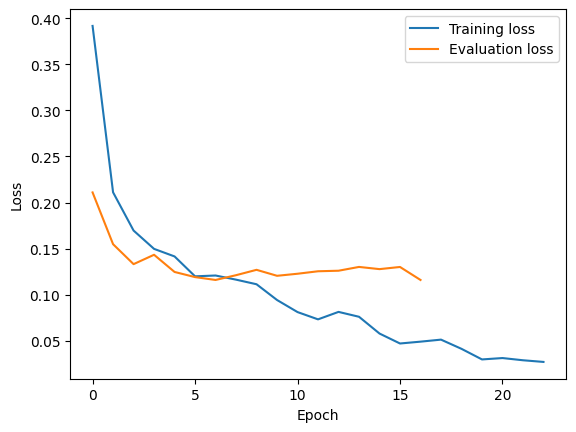

In [123]:
'''from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_metrics(p):
    # Apply sigmoid to predictions and then threshold
    preds = sigmoid(p.predictions)
    preds = (preds > 0.5).astype(int)
    labels = p.label_ids

    # Flatten the arrays
    preds = preds.flatten()
    labels = labels.flatten()

    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds, average='weighted'),
        'precision': precision_score(labels, preds, average='weighted'),
        'recall': recall_score(labels, preds, average='weighted')
    }
'''
trainer.compute_metrics = compute_metrics

# Evaluate the model
eval_result = trainer.evaluate()
print(f"Eval Results: {eval_result}")

# Plotting
history = trainer.state.log_history
training_loss = [x['loss'] for x in history if 'loss' in x]
eval_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]

plt.plot(training_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [124]:
import json

eval_result = trainer.evaluate()
print("Eval Results:")
print(json.dumps(eval_result, indent=4))


Eval Results:
{
    "eval_loss": 0.11595984548330307,
    "eval_accuracy": 0.9585266030013643,
    "eval_f1": 0.9585575081611527,
    "eval_precision": 0.9585894353338388,
    "eval_recall": 0.9585266030013643,
    "eval_runtime": 22.2751,
    "eval_samples_per_second": 32.907,
    "eval_steps_per_second": 8.26,
    "epoch": 5.0
}


Training Loss: [0.3917, 0.2111, 0.1696, 0.1497, 0.1415, 0.1199, 0.1208, 0.1163, 0.1113, 0.0942, 0.0811, 0.0732, 0.0813, 0.076, 0.0578, 0.047, 0.049, 0.0512, 0.0412, 0.0297, 0.0312, 0.0288, 0.027]
Evaluation Loss: [0.21097272634506226, 0.15479572117328644, 0.1331266462802887, 0.14330503344535828, 0.12465091794729233, 0.11906880885362625, 0.11595984548330307, 0.12113941460847855, 0.12696705758571625, 0.12048129737377167, 0.12271231412887573, 0.12539857625961304, 0.1259872317314148, 0.13010884821414948, 0.12772385776042938, 0.13006006181240082, 0.11595984548330307, 0.11595984548330307]
Training Steps: [350, 700, 1050, 1400, 1750, 2100, 2450, 2800, 3150, 3500, 3850, 4200, 4550, 4900, 5250, 5600, 5950, 6300, 6650, 7000, 7350, 7700, 8050]
Evaluation Steps: [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8360, 8360]


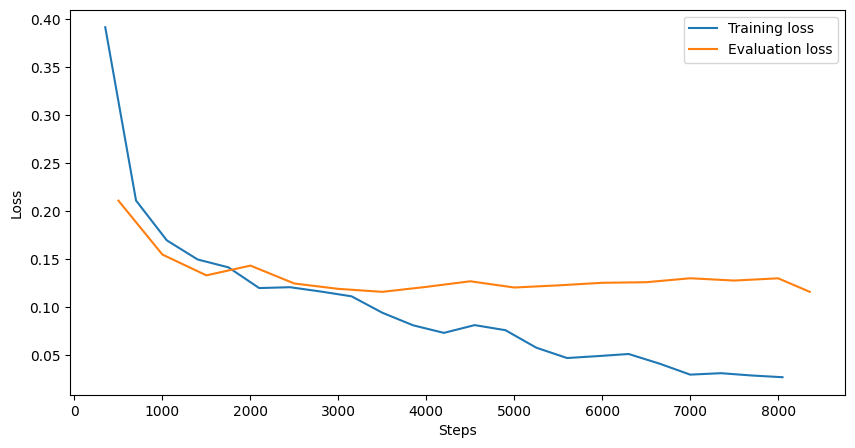

In [125]:
# Extracting logs from training history
history = trainer.state.log_history

# Extract training and evaluation losses and steps
training_loss = [entry['loss'] for entry in history if 'loss' in entry]
eval_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]
training_steps = [entry['step'] for entry in history if 'loss' in entry]
eval_steps = [entry['step'] for entry in history if 'eval_loss' in entry]

# Check if losses are captured correctly
print("Training Loss:", training_loss)
print("Evaluation Loss:", eval_loss)
print("Training Steps:", training_steps)
print("Evaluation Steps:", eval_steps)

# Plotting losses
plt.figure(figsize=(10, 5))
plt.plot(training_steps, training_loss, label='Training loss')
plt.plot(eval_steps, eval_loss, label='Evaluation loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
# Prepare the test dataset
test_dataset = ReviewDataset(
    reviews=test_df['review'].tolist(),
    labels=mlb.transform(test_df['insight_encoded'].apply(lambda x: list(map(int, x.split(', '))))),
    tokenizer=tokenizer
)


In [127]:
# Make predictions on the test set
predictions = trainer.predict(test_dataset)


In [128]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply sigmoid to predictions
pred_probs = sigmoid(predictions.predictions)
pred_labels = (pred_probs > 0.5).astype(int)

# Convert predictions back to the original labels
pred_insights = mlb.inverse_transform(pred_labels)

# Add predictions to the test DataFrame
test_df['predicted_insights'] = pred_insights

# Check the resulting DataFrame
print(test_df[['review', 'insight', 'predicted_insights']].head())


                                               review  \
8   It was very straightforward and the garage was...   
10                      Easy to use, also good price.   
16  Competitively priced and easy to use fitting c...   
17  Very easy to use. I was kept up to date every ...   
19      A very good experience and a set time booking   

                                              insight predicted_insights  
8                           [garage service positive]               (5,)  
10                         [value for money positive]               (9,)  
16  [location positive, value for money positive, ...          (5, 7, 9)  
17                         [value for money positive]               (9,)  
19                         [ease of booking positive]               (3,)  


<ipython-input-128-ec59a30ec26c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_insights'] = pred_insights


In [129]:
test_df.head()

,review,insight,insight_encoded,predicted_insights
8,It was very straightforward and the garage was...,[garage service positive],5,"(5,)"
10,"Easy to use, also good price.",[value for money positive],9,"(9,)"
16,Competitively priced and easy to use fitting c...,"[location positive, value for money positive, ...","7, 9, 5","(5, 7, 9)"
17,Very easy to use. I was kept up to date every ...,[value for money positive],9,"(9,)"
19,A very good experience and a set time booking,[ease of booking positive],3,"(3,)"


In [130]:
# Create a reverse mapping from encoded labels to insights
encoded_to_insight = {v: k for k, v in insight_to_encoded.items()}

# Function to decode insights from encoded labels
def decode_insights(encoded_list):
    insights = []
    for label in encoded_list.split(', '):
        if label.strip():  # Check if the label is not an empty string
            try:
                insights.append(encoded_to_insight[int(label)])
            except (ValueError, KeyError):
                # Handle invalid values or keys not found in encoded_to_insight
                pass
    return insights

# Apply the decoding function to the 'insight_encoded' and 'predicted_insights' columns
test_df['decoded_insight'] = test_df['insight_encoded'].apply(lambda x: decode_insights(x))
test_df['decoded_predicted_insights'] = test_df['predicted_insights'].apply(lambda x: decode_insights(', '.join(map(str, x))))

# Check the resulting DataFrame
print(test_df[['review', 'decoded_insight', 'decoded_predicted_insights']].head())

                                               review  \
8   It was very straightforward and the garage was...   
10                      Easy to use, also good price.   
16  Competitively priced and easy to use fitting c...   
17  Very easy to use. I was kept up to date every ...   
19      A very good experience and a set time booking   

                                      decoded_insight  \
8                           [garage service positive]   
10                         [value for money positive]   
16  [location positive, value for money positive, ...   
17                         [value for money positive]   
19                         [ease of booking positive]   

                           decoded_predicted_insights  
8                           [garage service positive]  
10                         [value for money positive]  
16  [garage service positive, location positive, v...  
17                         [value for money positive]  
19                         [ease o

<ipython-input-130-2909c56a32d5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['decoded_insight'] = test_df['insight_encoded'].apply(lambda x: decode_insights(x))
<ipython-input-130-2909c56a32d5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['decoded_predicted_insights'] = test_df['predicted_insights'].apply(lambda x: decode_insights(', '.join(map(str, x))))


In [131]:
test_df.head()

,review,insight,insight_encoded,predicted_insights,decoded_insight,decoded_predicted_insights
8,It was very straightforward and the garage was...,[garage service positive],5,"(5,)",[garage service positive],[garage service positive]
10,"Easy to use, also good price.",[value for money positive],9,"(9,)",[value for money positive],[value for money positive]
16,Competitively priced and easy to use fitting c...,"[location positive, value for money positive, ...","7, 9, 5","(5, 7, 9)","[location positive, value for money positive, ...","[garage service positive, location positive, v..."
17,Very easy to use. I was kept up to date every ...,[value for money positive],9,"(9,)",[value for money positive],[value for money positive]
19,A very good experience and a set time booking,[ease of booking positive],3,"(3,)",[ease of booking positive],[ease of booking positive]


In [132]:
# Define filename and path (replace with your desired name and path)
filename = "result_file.csv"
if 'drive' in locals():  # Check if Google Drive is mounted
  save_path = f"/content/drive/MyDrive/{filename}"  # Save to Drive
else:
  save_path = filename  # Save to Colab runtime (temporary)

# Save the DataFrame to CSV
test_df.to_csv(save_path, index=False)

print(f"Test data saved to: {save_path}")


Test data saved to: /content/drive/MyDrive/result_file.csv


In [133]:
# Compute metrics for test set
test_metrics = compute_metrics(predictions)

# Print the metrics
print(f"Test Metrics: {test_metrics}")

Test Metrics: {'accuracy': 0.9738014854827819, 'f1': 0.9737867392566921, 'precision': 0.9737725923325131, 'recall': 0.9738014854827819}


In [139]:
from tabulate import tabulate

table_data = [[key, round(value*100, 2)] for key, value in test_metrics.items()]

# Print the metrics as a table
print(tabulate(table_data, headers=["Metric", "Value in %age"], tablefmt="pretty"))


+-----------+---------------+
|  Metric   | Value in %age |
+-----------+---------------+
| accuracy  |     97.38     |
|    f1     |     97.38     |
| precision |     97.38     |
|  recall   |     97.38     |
+-----------+---------------+


Some of the limitations of my method that I can think of are:
1. It does not consider all the insights and associated sentiments. A lot of those were dropped to overcome undersampling.
2. It only uses BERT, and does not address other methods in which this problem can be solved.

Some of the ways in which this model can be improved further are:
1. More weights can be assigned to the minority classes, that could lead to even better results.
2. Even though, we obtained good results here, adding more syntethic data to increase the population of the minority classes can also help.
3. I was constrained due to available compute, but we can also train this model for more epochs, and that could also lead to better results.
